 # <div style="text-align: center">Shoot Outcome Prediction</div>

 ## <div style="text-align: center">Neural Network</div>

### Set Up

In [1]:
# Importing libraries

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tensorflow import keras
from sklearn.datasets import make_circles
from keras.layers import Dense
from keras.models import Sequential
from keras.regularizers import l1
from keras.layers import Activation
from matplotlib import pyplot
from sklearn.preprocessing import StandardScaler


Using TensorFlow backend.


In [2]:
file_path = "/Users/ysadre/Desktop/NBA Expected Point/Data/"
df = pd.read_csv(file_path + "PredictIonProject.csv", delimiter=";")

In [3]:
X = df.iloc[:,2:7].values
y = df.iloc[:,7:8].values

In [4]:
print(y.shape)
print(X.shape)

(128069, 1)
(128069, 5)


In [5]:
sc = StandardScaler()
X = sc.fit_transform(X)

In [6]:
from keras.regularizers import l2
from keras.layers import LSTM
from keras.layers import Conv2D

In [7]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
y = ohe.fit_transform(y).toarray()

In [8]:
y

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [1., 0.],
       [0., 1.]])

In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.1, random_state = 1 )

In [10]:
model = Sequential()
model.add(Dense(500, input_dim=5, activation='relu',activity_regularizer=l1(0.0001), bias_regularizer=l2(0.01)))
model.add(Dense(8, activation='sigmoid'))
model.add(Dense(2, activation='relu'))
#keras.backend.set_epsilon(1)

2022-02-06 19:15:51.546161: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2022-02-06 19:15:51.547730: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 10. Tune using inter_op_parallelism_threads for best performance.


In [11]:
model.compile(loss='binary_crossentropy', optimizer='adamax', metrics=['accuracy'])

In [12]:
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=50)

Train on 115262 samples, validate on 12807 samples
Epoch 1/50
115262/115262 [==============================] - 15s 129us/step - loss: 7.7133 - accuracy: 0.5000 - val_loss: 7.7125 - val_accuracy: 0.5000
Epoch 2/50
115262/115262 [==============================] - 14s 124us/step - loss: 7.7125 - accuracy: 0.5000 - val_loss: 7.7125 - val_accuracy: 0.5000
Epoch 3/50
115262/115262 [==============================] - 14s 124us/step - loss: 7.7125 - accuracy: 0.5000 - val_loss: 7.7125 - val_accuracy: 0.5000
Epoch 4/50
115262/115262 [==============================] - 14s 125us/step - loss: 7.7125 - accuracy: 0.5000 - val_loss: 7.7125 - val_accuracy: 0.5000
Epoch 5/50
115262/115262 [==============================] - 14s 123us/step - loss: 7.7125 - accuracy: 0.5000 - val_loss: 7.7125 - val_accuracy: 0.5000
Epoch 6/50
115262/115262 [==============================] - 14s 125us/step - loss: 7.7125 - accuracy: 0.5000 - val_loss: 7.7125 - val_accuracy: 0.5000
Epoch 7/50
115262/115262 [=================

In [13]:
_, train_acc = model.evaluate(X_train, Y_train)
_, test_acc = model.evaluate(X_test, Y_test)

12807/12807 [==============================] - 0s 25us/step


In [14]:
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train: 0.500, Test: 0.500


In [15]:
Y_pred = model.predict(X_test)
#Converting predictions to label
pred = list()
for i in range(len(Y_pred)):
    pred.append(np.argmax(Y_pred[i]))
#Converting one hot encoded test label to label
test = list()
for i in range(len(Y_test)):
    test.append(np.argmax(Y_test[i]))

from sklearn.metrics import accuracy_score
a = accuracy_score(pred,test)
print('Accuracy is:', a*100)

Accuracy is: 54.59514328101819


In [16]:
b = np.zeros_like(Y_pred)
b[np.arange(len(Y_pred)), Y_pred.argmax(1)] = 1
b

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

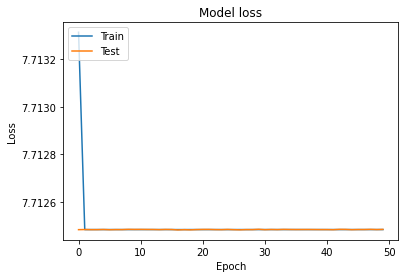

In [17]:
plt.plot(history.history['loss']) 
plt.plot(history.history['val_loss']) 
plt.title('Model loss') 
plt.ylabel('Loss') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Test'], loc='upper left') 
plt.show()

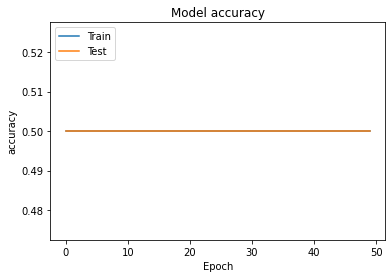

In [18]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy']) 
plt.plot(history.history['val_accuracy']) 
plt.title('Model accuracy') 
plt.ylabel('accuracy') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Test'], loc='upper left') 
plt.show()

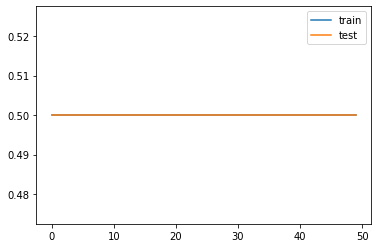

In [19]:
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

In [20]:
b = np.zeros_like(Y_pred)
b[np.arange(len(Y_pred)), Y_pred.argmax(1)] = 1
b

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [21]:
listytest = []
for elem in Y_test:
    if (elem == [1. , 0.]).all():
        listytest.append(0)
    elif (elem == [0. ,1.]).all():
        listytest.append(1)
    #elif (elem == [0. ,0., 0., 0., 1., 0.]).all():
     #   listytest.append(4)
    #elif (elem == [0. ,0., 0., 0., 0., 1.]).all():
     #   listytest.append(5)
print(listytest)

[0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 

In [22]:
listypred = []
for elem in b:
    if (elem == [1. , 0.]).all():
        listypred.append(0)
    elif (elem == [0. ,1.]).all():
        listypred.append(1)
    
    #elif (elem == [0. ,0., 0., 0., 1., 0.]).all():
     #   listypred.append(4)
    #elif (elem == [0. ,0., 0., 0., 0., 1.]).all():
     #   listypred.append(5)
print(listypred)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [23]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
cm = confusion_matrix(y_true=listytest, y_pred=listypred)

def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    #for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
     #   plt.text(j, i, cm[i, j],
      #      horizontalalignment="center",
       #     color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[6992    0]
 [5815    0]]


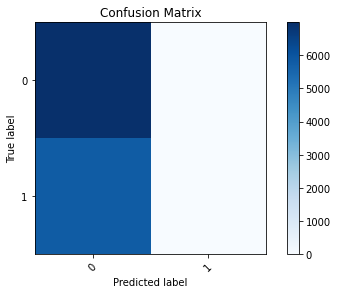

In [24]:
cm_plot_labels = ['0','1']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')